<div dir="rtl">
    
###

   - **יש למלא את המחברת באנגלית בלבד**
   - **מומלץ להשתמש בהמשך באותו הקובץ להגשת הפרויקט (מיחקו את התא הזה)**
   - **הקפידו למלא טקסט בשדות מסוג מארק-דאון וקוד בשדות מסוג קוד (אחרת ירדו לכם נקודות)**
     
###   המחברת תכלול  (לכל הפחות):
- שם הפרויקט
- שמות מלאים של כל חברי הצוות, ללא ת.ז
- תיאור הפרויקט (3-4 משפטים)
- קישור למקור ממנו הורדתם את הנתונים  
- הסבר על מקור הנתונים
- תיאור קצר של הדאטה בעזרת הפקודות שנלמדו בקורס ונעשה בהם שימוש בפרוירט
- שלוש שאלות ראשוניות של דברים שהיה מעניין אתכם להוציא מהקובץ
#### בהצלחה !
</div>

# Project Name: `Layoff Trends in the Global Tech Industry (2020–2024)`


### Project team members:
- `Miriam Dinay`
- `Roni Shapiro`

### Project number: <insert here>
`10`

### Project description:
`1-3 lines describing your project`

### Link to the data:
The dataset was downloaded from Kaggle:  
https://www.kaggle.com/datasets/ulrikeherold/tech-layoffs-2020-2024

### Explain the data source:
`1-3 lines describing how this data was gathered, where from etc.`

----

#### Read you file from Github:

In [200]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [202]:
url='https://raw.githubusercontent.com/MiriamDinay/Layoff-Trends/main/tech_layoffs.csv'
Layoff_df=pd.read_csv(url)
Layoff_df.head()

,#,Company,Location_HQ,Country,Continent,Laid_Off,Date_layoffs,Percentage,Company_Size_before_Layoffs,Company_Size_after_layoffs,Industry,Stage,Money_Raised_in_$_mil,Year,lat,lng
0,3,ShareChat,Bengaluru,India,Asia,200.0,2023-12-20,15.0,1333.0,1133.0,Consumer,Series H,$1700,2023,12.97194,77.59369
1,4,InSightec,Haifa,Israel,Asia,100.0,2023-12-19,20.0,500.0,400.0,Healthcare,Unknown,$733,2023,32.81841,34.98850
2,6,Enphase Energy,San Francisco Bay Area,USA,North America,350.0,2023-12-18,10.0,3500.0,3150.0,Energy,Post-IPO,$116,2023,37.54827,-121.98857
3,7,Udaan,Bengaluru,India,Asia,100.0,2023-12-18,10.0,1000.0,900.0,Retail,Unknown,NaN,2023,12.97194,77.59369
4,14,Cruise,San Francisco Bay Area,USA,North America,900.0,2023-12-14,24.0,3750.0,2850.0,Transportation,Acquired,$15000,2023,37.77493,-122.41942


#### Describe the data
* How many rows?
* How many columns?
* How many numeric columns? (not including numerical identifiers - numbers that uniquely define the row)
* How many categorical columns? (not including string identifiers -  values that uniquely define the row)

In [204]:
#How many rows?
#How many columns?
Layoff_df.shape

(1672, 16)

In [205]:
Layoff_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1672 entries, 0 to 1671
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   #                            1672 non-null   int64  
 1   Company                      1672 non-null   object 
 2   Location_HQ                  1672 non-null   object 
 3   Country                      1672 non-null   object 
 4   Continent                    1672 non-null   object 
 5   Laid_Off                     1565 non-null   float64
 6   Date_layoffs                 1672 non-null   object 
 7   Percentage                   1570 non-null   float64
 8   Company_Size_before_Layoffs  1511 non-null   float64
 9   Company_Size_after_layoffs   1536 non-null   float64
 10  Industry                     1672 non-null   object 
 11  Stage                        1672 non-null   object 
 12  Money_Raised_in_$_mil        1596 non-null   object 
 13  Year              

### יצירת Layoff_df_copy
עובדים רק עליו מכאן והלאה, המקור נשאר נקי

In [210]:
# לשים לב לכתוב על מחיקת השורות שאנחנו לא צריכים למחקר. אחר כך נרשום הכל בצורה מסודרת
Layoff_df_copy = Layoff_df.copy()
Layoff_df_copy['Date_layoffs'] = pd.to_datetime(Layoff_df_copy['Date_layoffs'])
Layoff_df_copy['Money_Raised_in_$_mil'] = (Layoff_df_copy['Money_Raised_in_$_mil'].astype(str).str.replace(r'[$,]', '', regex=True))
Layoff_df_copy['Money_Raised_in_$_mil'] = pd.to_numeric(Layoff_df_copy['Money_Raised_in_$_mil'],errors='coerce')
Layoff_df_copy['#'] = Layoff_df_copy['#'].astype(str)
Layoff_df_copy = Layoff_df_copy.drop(columns=['lat', 'lng',])
Layoff_df_copy.dtypes

#                                      object
Company                                object
Location_HQ                            object
Country                                object
Continent                              object
Laid_Off                              float64
Date_layoffs                   datetime64[ns]
Percentage                            float64
Company_Size_before_Layoffs           float64
Company_Size_after_layoffs            float64
Industry                               object
Stage                                  object
Money_Raised_in_$_mil                 float64
Year                                    int64
dtype: object

In [211]:
# בדיקה אם יש הבדלים בשנה והאם אפשר לסמוך על העמודה הזאת
mismatch = Layoff_df_copy[Layoff_df_copy['Date_layoffs'].dt.year != Layoff_df_copy['Year']]
mismatch.shape

(37, 14)

בבדיקת עקביות נוספת, נמצאו 37 רשומות שבהן שנת הפיטורין המדווחת לא תאמה את התאריך המלא. כדי להבטיח דיוק בניתוח הנתונים, החלטנו להתבסס אך ורק על עמודת ה-Date_layoffs ולעדכן את עמודת השנה לפיה.

In [215]:
# דריסת עמודת השנה המקורית בשנה המדויקת מהתאריך
Layoff_df_copy['Year'] = Layoff_df_copy['Date_layoffs'].dt.year

In [216]:
Layoff_df_copy.isnull().sum().sort_values(ascending=False)

Company_Size_before_Layoffs    161
Company_Size_after_layoffs     136
Laid_Off                       107
Percentage                     102
Money_Raised_in_$_mil           76
#                                0
Company                          0
Location_HQ                      0
Country                          0
Continent                        0
Date_layoffs                     0
Industry                         0
Stage                            0
Year                             0
dtype: int64

בחרנו לבצע המרת טיפוסי נתונים לפני ניקוי שורות כדי לשמר את שלמות בסיס הנתונים המקורי. ערכים חסרים לא הושלמו באופן מלאכותי כדי למנוע הטיה בניתוח חומרת הפיטורין וגודל החברות

In [218]:
# 4. ניקוי שורות שאין בהן מידע על פיטורין בכלל (כמות או אחוז)
# זהו השלב שבו אנחנו מוודאים שכל שורה ב-Dataset יכולה לתרום למחקר
Layoff_df_copy = Layoff_df_copy.dropna(subset=['Laid_Off', 'Percentage'], how='all')

# 5. בקרת איכות (Sanity Check) - השוואת הפרשי גדלים לכמות המפוטרים
# הבדיקה מתבצעת רק היכן שכל שלושת הנתונים קיימים במקור
mask = (
    Layoff_df_copy['Company_Size_before_Layoffs'].notna() &
    Layoff_df_copy['Company_Size_after_layoffs'].notna() &
    Layoff_df_copy['Laid_Off'].notna()
)

Layoff_df_copy.loc[mask, 'size_diff_check'] = (
    Layoff_df_copy['Company_Size_before_Layoffs'] -
    Layoff_df_copy['Company_Size_after_layoffs'] -
    Layoff_df_copy['Laid_Off']
)

# הצגת סיכום הנתונים לאחר הניקוי
print(f"Total rows after cleaning: {len(Layoff_df_copy)}")
print(Layoff_df_copy.dtypes)

Total rows after cleaning: 1624
#                                      object
Company                                object
Location_HQ                            object
Country                                object
Continent                              object
Laid_Off                              float64
Date_layoffs                   datetime64[ns]
Percentage                            float64
Company_Size_before_Layoffs           float64
Company_Size_after_layoffs            float64
Industry                               object
Stage                                  object
Money_Raised_in_$_mil                 float64
Year                                    int32
size_diff_check                       float64
dtype: object


In [219]:
inconsistent_rows = Layoff_df_copy[Layoff_df_copy['size_diff_check'] != 0].shape[0]
print(f"Number of rows with inconsistencies: {inconsistent_rows}")

Number of rows with inconsistencies: 114


הפער שנמצא ב-114 רשומות מדגיש ששינויים במצבת כוח האדם מושפעים מגורמים נוספים מלבד פיטורים מוכרזים, כגון עזיבה מרצון או שינויים ארגוניים פנימיים. לכן, שמירה על הנתונים המקוריים מבטיחה ניתוח אובייקטיבי יותר

In [224]:
(Layoff_df_copy.loc[mask, 'size_diff_check'] == 0).mean()

0.99933818663137

כדי להעריך את איכות הנתונים, ביצענו בדיקת הצלבה (Sanity Check) על תת-קבוצה של רשומות המכילות נתונים מלאים לגבי גודל החברה (לפני ואחרי) ומספר המפוטרים.

ממצאי הבדיקה:

מתוך השורות שנבדקו (ה-mask), נמצא כי ב-114 רשומות קיים פער מתמטי.

פער זה אינו מעיד על חוסר אמינות של ה-Dataset, אלא על כך שהשינוי במצבת כוח האדם מושפע מגורמים נוספים כמו עזיבה מרצון או גיוס במקביל.

בדיקה זו חיזקה את ההחלטה המתודולוגית לא לבצע השלמת נתונים (Imputation) בצורה אוטומטית, אלא לעבוד עם הנתונים המקוריים בלבד כדי לשמור על אובייקטיביות הניתוח

##### יצרנו העתק של קובץ הנתונים המקורי, סידרנו אותם וסיווגנו את "טיפוסי" העמודות.
##### מעתה, בהמשך העבודה נעבוד על קובץ ההעתק בלבד.

In [229]:
Layoff_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1624 entries, 0 to 1671
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   #                            1624 non-null   object        
 1   Company                      1624 non-null   object        
 2   Location_HQ                  1624 non-null   object        
 3   Country                      1624 non-null   object        
 4   Continent                    1624 non-null   object        
 5   Laid_Off                     1565 non-null   float64       
 6   Date_layoffs                 1624 non-null   datetime64[ns]
 7   Percentage                   1570 non-null   float64       
 8   Company_Size_before_Layoffs  1511 non-null   float64       
 9   Company_Size_after_layoffs   1536 non-null   float64       
 10  Industry                     1624 non-null   object        
 11  Stage                        1624 non-null   obj

In [230]:
#האם כדאי להשאיר או למחוק את עמודות הקורדינטות והסולמית.
# Layoff_df_copy.describe()

In [231]:
# How many numeric columns?
numeric_cols = Layoff_df_copy.select_dtypes(include=['int64', 'float64']).columns

print(f"Number of numerical columns: {len(numeric_cols)}")
print(f"The columns are: {list(numeric_cols)}")

Number of numerical columns: 6
The columns are: ['Laid_Off', 'Percentage', 'Company_Size_before_Layoffs', 'Company_Size_after_layoffs', 'Money_Raised_in_$_mil', 'size_diff_check']


In [234]:
# How many categorical columns?
categorical_cols = Layoff_df_copy.select_dtypes(include=['object']).columns
categorical_cols = categorical_cols.drop(['Company', '#']) #האם להוריד או להשאיר?

print(f"Number of meaningful categorical columns: {len(categorical_cols)}")
print(f"The columns are: {list(categorical_cols)}")

Number of meaningful categorical columns: 5
The columns are: ['Location_HQ', 'Country', 'Continent', 'Industry', 'Stage']


Categorical columns were identified based on object data types, while string identifiers such as the company name were excluded from the analysis.

הוספה שלנו!!!!!!

Data Overview

The dataset contains **1,672 rows** and **16 columns**, each representing a layoff event in the global tech industry between 2020 and 2024.

After data cleaning and filtering, the working dataset includes **1,624 observations**.

Numeric variables include the number of employees laid off, layoff percentage, company size before and after layoffs, and total funding raised.  
Categorical variables include company location, country, continent, industry, and company stage.

Identifier columns and textual identifiers (such as company names) were excluded from numerical and categorical analyses.

#### Write three questions you would like to answer using this data

1. `How do layoff patterns vary over time, and are there noticeable peaks during specific periods between 2020 and 2024?`

2. `How does company stage influence the frequency and severity of layoffs in the tech industry?`

    How does company stage (e.g., early-stage, post-IPO, acquired) influence the frequency and severity of layoffs in the tech industry?

3. `Do smaller companies experience more severe layoffs relative to their size compared to larger companies?`

   Do smaller companies experience more severe layoffs relative to their workforce size compared to larger companies?

In [243]:
# 1. יצירת עמודת הרבעון המקורית (כדי לשמור על הסדר הכרונולוגי)
Layoff_df_copy['Quarter_Period'] = Layoff_df_copy['Date_layoffs'].dt.to_period('Q')

# 2. יצירת סיכום רבעוני
qtr_summary = (
    Layoff_df_copy
    .loc[Layoff_df_copy['Date_layoffs'].dt.year.between(2020, 2024)]
    .groupby('Quarter_Period')
    .agg(
        Total_Laid_Off=('Laid_Off', 'sum'),
        Layoff_Events=('#', 'count')
    )
    .reset_index()
)

# 3. שינוי הנראות מ-2020Q1 ל-2020 Q1 (הוספת רווח לפני ה-Q)
# אנחנו הופכים את זה לטקסט ומשתמשים ב-replace כדי להוסיף רווח
qtr_summary['Quarter_Period'] = qtr_summary['Quarter_Period'].astype(str).str.replace('Q', ' Q')

qtr_summary.head()


,Quarter_Period,Total_Laid_Off,Layoff_Events
0,2020 Q1,7441.0,61
1,2020 Q2,49710.0,245
2,2020 Q3,4390.0,21
3,2020 Q4,419.0,6
4,2021 Q1,848.0,6


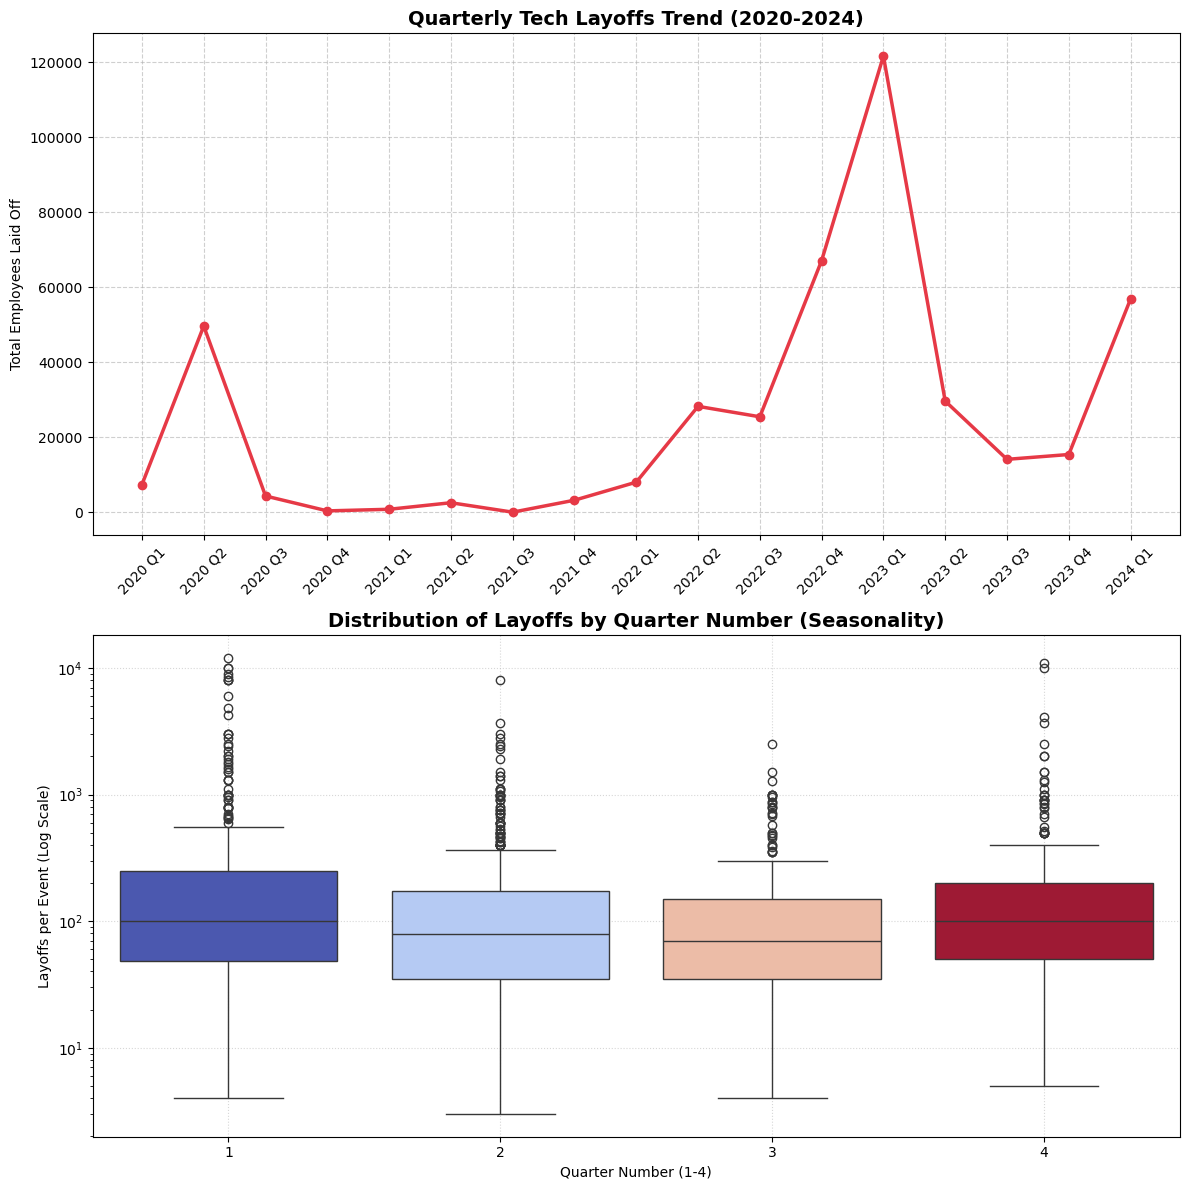


--- The 3 Most Volatile Quarters Found ---


,Quarter_Period,Total_Laid_Off
0,2023 Q1,121667.0
1,2022 Q4,67152.0
2,2024 Q1,56918.0


In [245]:
# --- Question 1: Visualizations (Quarterly Trends) ---

# 1. הכנת נתוני ה-Boxplot (צריך את הנתונים הגולמיים, לא המסוכמים)
df_q1 = Layoff_df_copy.dropna(subset=['Date_layoffs', 'Laid_Off']).copy()
df_q1['Quarter_Num'] = df_q1['Date_layoffs'].dt.quarter

# הגדרת אזור תצוגה עם שני גרפים
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

# 2. גרף קווי - מגמה רבעונית (Trend Analysis)
# כאן אנחנו משתמשים ב-qtr_summary שיצרת בתא הקודם!
ax1.plot(qtr_summary['Quarter_Period'], qtr_summary['Total_Laid_Off'], 
         marker='o', linestyle='-', color='#e63946', linewidth=2.5)

ax1.set_title('Quarterly Tech Layoffs Trend (2020-2024)', fontsize=14, fontweight='bold')
ax1.set_ylabel('Total Employees Laid Off')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, linestyle='--', alpha=0.6)

# 3. Boxplot - בדיקת עונתיות (Seasonality)
sns.boxplot(data=df_q1, x='Quarter_Num', y='Laid_Off', hue='Quarter_Num', ax=ax2, palette='coolwarm', legend=False)
ax2.set_title('Distribution of Layoffs by Quarter Number (Seasonality)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Quarter Number (1-4)')
ax2.set_ylabel('Layoffs per Event (Log Scale)')
ax2.set_yscale('log')
ax2.grid(True, linestyle=':', alpha=0.5)

plt.tight_layout()
plt.show()

# 4. חילוץ והצגת ה-Peaks מתוך ה-qtr_summary שלך
top_q_peaks = qtr_summary.sort_values(by='Total_Laid_Off', ascending=False).head(3)
print("\n--- The 3 Most Volatile Quarters Found ---")
display(top_q_peaks[['Quarter_Period', 'Total_Laid_Off']].reset_index(drop=True))

בסביבות ינואר 2023 בדרך כלל רואים את השיא הגדול ביותר (משבר האינפלציה העולמי).

בסביבות מרץ-אפריל 2020 רואים את הפיק של תחילת הקורונה.

In [247]:
###הגרף כאן לפי חודשים, הוא מצוין רק צריך לפי רבוענים. זה ללא בוקס 


# 3. יצירת הגרף (כפי שהצעת - הכי נכון ויזואלית)
plt.figure(figsize=(14, 6))
plt.plot(monthly_layoffs.index, monthly_layoffs.values, marker='o', linestyle='-', color='#e63946', linewidth=2)

plt.title('Total Layoffs in Tech (2020-2024) - Trend Analysis', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Employees Laid Off', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# 4. חילוץ ה-Peaks והצגתם כטבלה מסודרת
top_peaks_df = monthly_layoffs.sort_values(ascending=False).head(3).reset_index()
top_peaks_df.columns = ['Month', 'Total_Laid_Off']

print("Noticeable Peaks Found:")
top_peaks_df

NameError: name 'monthly_layoffs' is not defined

<Figure size 1400x600 with 0 Axes>

<div style="background-color: #f0f0f0; padding: 10px; border-radius: 5px;">
  <span style="color: red;"><strong>— Do not proceed beyond this point. This is for the next steps, do not fill in —</strong></span>
</div>


---
### <span style="color:green"> Observation 1:</span>
How do layoff patterns vary over time, and are there noticeable peaks during specific periods between 2020 and 2024?
>
>
>
>


---

In [397]:
# --- Question 1: Line plot (with points) + 2x2 Boxplots + Top-3 table ---
# =========================
# 1) הכנת נתונים לבוקספלוט (כל השנים יחד)
# =========================
df_q1 = Layoff_df_copy.dropna(subset=['Date_layoffs', 'Laid_Off']).copy()
df_q1['Laid_Off'] = pd.to_numeric(df_q1['Laid_Off'], errors='coerce')
df_q1 = df_q1.dropna(subset=['Laid_Off'])
df_q1 = df_q1[df_q1['Laid_Off'] > 0]  # חובה בשביל log scale
df_q1['Quarter_Num'] = df_q1['Date_layoffs'].dt.quarter
# =========================
# 2) הכנת נתוני הגרף הקווי עם נקודות (מ-qtr_summary)
# =========================
qtr_plot = qtr_summary.sort_values('Quarter_Period').copy()
qtr_plot['Quarter_Label'] = (qtr_plot['Quarter_Period'].astype(str).str.replace('Q', ' Q', regex=False))
# =========================
# A) גרף קווי (אדום) + נקודות בהירות
# =========================
plt.figure(figsize=(10, 6))
plt.plot(qtr_plot['Quarter_Label'],qtr_plot['Total_Laid_Off'],linestyle='-',linewidth=2.8,color='#e63946',marker='o',markersize=6,markerfacecolor='#f1faee',markeredgecolor='#e63946')
plt.title('Quarterly Distribution of Total Layoffs (2020–2024)', fontsize=14, fontweight='bold')
plt.xlabel('Quarter')
plt.ylabel('Total Employees Laid Off')
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()
# =========================
# B) 2x2 Boxplots – Seasonality (כל השנים יחד)
# =========================
pastel_colors = ['#A8DADC', '#B7E4C7', '#CDB4DB', '#FFCAD4']
fig, axes = plt.subplots(2, 2, figsize=(10, 6), sharey=True)
axes = axes.flatten()
for i, q in enumerate([1, 2, 3, 4]):
    sns.boxplot(data=df_q1[df_q1['Quarter_Num'] == q], y='Laid_Off', ax=axes[i], color=pastel_colors[i], width=0.5, fliersize=4)
    axes[i].set_title(f'Q{q}: Layoffs per Event (All Years)', fontsize=12, fontweight='bold')
    axes[i].set_ylabel('Layoffs per Event (Log Scale)')
    axes[i].set_xlabel('')
    axes[i].set_yscale('log')
    axes[i].grid(True, linestyle=':', alpha=0.5)
plt.suptitle('Seasonality of Layoffs by Quarter (All Years Combined)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()
# =========================
# C) טבלה – Top 3 רבעונים לפי סה"כ מפוטרים
# =========================
top_q_peaks = qtr_summary.sort_values(by='Total_Laid_Off', ascending=False).head(3)

print("\n--- Top 3 Quarters by Total Layoffs ---")
display(top_q_peaks[['Quarter_Period', 'Total_Laid_Off']].reset_index(drop=True))


KeyError: 'Total_Laid_Off'

<Figure size 1000x600 with 0 Axes>

 .ניתוח דפוסי הפיטורים בין השנים 2020–2024 מעלה כי הפיטורים אינם מתפלגים באופן אחיד לאורך השנה, אלא מציגים שונות בין רבעונים
 .מהגרף הקווי של סך הפיטורים הרבעוניים עולה כי רבעונים הראשונים של השנה מופיעים לעיתים קרובות בין נקודות השיא של מספר המפוטרים, דבר המצביע על גלי פיטורים משמעותיים יותר בתחילת השנה
 .ממצא זה מתחזק באמצעות ניתוח הבוקס־פלוט, אשר בוחן את התפלגות אירועי הפיטורים ברמת החברה הבודדת. 
 .ברבעון הראשון נצפה חציון גבוה יותר ופיזור רחב יותר בהשוואה לרבעונים אחרים, המעידים כי אירוע פיטורים טיפוסי ברבעון הראשון נוטה להיות חמור יותר
 .שילוב ממצאים אלו מצביע על כך שהרבעון הראשון של השנה מאופיין בעוצמת פיטורים גבוהה יחסית, באופן החוזר לאורך מספר שנים, דבר המרמז על דפוס עונתי אפשרי בדאטה

---
### <span style="color:green"> Observation 2:</span>

>
>
>
>


---

---
### <span style="color:green"> Observation 3:</span>

>
>
>
>


---

---
### <span style="color:green"> Summary</span>

> Anything you'd like to say - your conclusions, summary, how hard you worked etc.
>
>    
>   
   

---

### דוגמה לתצוגה יפה

---
# <span style="color: #4169E1">**Global Tech Layoffs Analysis (2020-2024)**</span>

## <span style="color: #4169E1">**Group number 10**</span>

### <span style="color: #4169E1">Names of students:</span>  
<span style="color: #4169E1">Miriam Dinay</span><br>
<span style="color: #4169E1">Roni Shapiro</span><br>

<span style="color: #4169E1">From:</span><br>
<span style="color: #4169E1">Link to Source:</span> https://layoffs.fyi/ <br>
<span style="color: #4169E1">Data sources:</span> Layoffs.fyi Tracker, Bloomberg Technology, TechCrunch, Crunchbase Insights

---

<div dir="rtl" style="text-align: right;">

# <span style="color: #4169E1">ניתוח פיטורים בתעשיית ההייטק העולמית</span>
# <span style="color: #4169E1">Global Tech Layoffs Analysis</span>

### <span style="color: #4169E1">קבוצה מספר: 10</span>

### <span style="color: #4169E1">שמות הסטודנטיות:</span>
<div dir="rtl" style="text-align: right;">
רוני שפירא
<br>
מרים דינאי

<br>

### <span style="color: #4169E1">קישור הנתונים:</span>
<div dir="rtl" style="text-align: right;">
<span style="color: #4169E1">[https://layoffs.fyi/](https://layoffs.fyi/)</span>

### <span style="color: #4169E1">מקור הנתונים:</span>
<div dir="rtl" style="text-align: right;">
Layoffs.fyi Tracker, Bloomberg Technology, TechCrunch, Crunchbase Insights

</div>

In [277]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<div dir="rtl" style="text-align: right;">

<h3 style="color: #4169E1; background-color: #f0f4ff; padding: 10px; border-right: 5px solid #4169E1;">תוכן עניינים</h3>

<ul style="list-style-type: none; padding-right: 20px;">
  <li>
    <a href="#theory" style="text-decoration: none; color: #4169E1;"><b>מבוא תיאורטי</b></a>
  </li>
  <li>
    <a href="#intro" style="text-decoration: none; color: #4169E1;"><b>פתיחה והיכרות עם הנתונים:</b></a> 
    <span style="color: black;">טעינה, ניקוי והכנת ה-DataFrame</span>
  </li>
  <li>
    <a href="#part1" style="text-decoration: none; color: #4169E1;"><b>חלק ראשון: מגמות זמן -</b></a> 
    <span style="color: black;">ניתוח רבעוני של הפיטורים (2020-2024)</span>
  </li>
  <li>
    <a href="#part2" style="text-decoration: none; color: #4169E1;"><b>חלק שני: שלב החברה -</b></a> 
    <span style="color: black;">השפעת שלב הגיוס על יציבות החברה</span>
  </li>
  <li>
    <a href="#part3" style="text-decoration: none; color: #4169E1;"><b>חלק שלישי: גודל החברה -</b></a> 
    <span style="color: black;">הקשר בין גודל הארגון להיקף הפיטורים</span>
  </li>
  <li>
    <a href="#summary" style="text-decoration: none; color: #4169E1;"><b>סיכום ומסקנות</b></a>
  </li>
</ul>

</div>

<h3 style="color: #4169E1; background-color: #f0f4ff; padding: 10px; border-right: 5px solid #4169E1; text-align: right; direction: rtl;">מבוא וסקירה תיאורטית</h3>

<h4 style="color: #4169E1; text-align: right; direction: rtl;">מקור הנתונים וחשיבות המאגר</h4>
<p dir="rtl" style="text-align: right; color: black; line-height: 1.8;">
הניתוח בפרויקט זה מתבסס על נתונים שנאספו מתוך מאגר הנתונים של <b>Layoffs.fyi</b>, אתר העוקב בזמן אמת אחר פיטורים בתעשיית ההייטק העולמית מאז פרוץ מגפת הקורונה. המאגר נחשב למקור המהימן והמקיף ביותר בתחום, והוא משמש עיתונאי כלכלה ואנליסטים ברחבי העולם למעקב אחר מגמות בשוק התעסוקה הטכנולוגי.
</p>

<h4 style="color: #4169E1; text-align: right; direction: rtl;">על מה התבסס הניתוח בפרויקט?</h4>
<p dir="rtl" style="text-align: right; color: black; line-height: 1.8;">
לצורך הפרויקט, השתמשנו במערך נתונים הכולל דיווחים על אירועי פיטורים בין השנים 2020–2024. הנתונים מאפשרים לנו לבחון לא רק את כמות המפוטרים (Laid Off), אלא גם משתנים קריטיים נוספים:
</p>

<ul dir="rtl" style="text-align: right; color: black; line-height: 1.8; padding-right: 40px;">
    <li><b>היקף הפיטורים (Laid Off Count):</b> מספר העובדים שפוטרו בכל אירוע. משתנה זה מאפשר לנו לזהות את עוצמת הזעזוע בכל חברה וסקטור.</li>
    <li><b>סבב גיוס ההון (Stage):</b> הנתונים כוללים מידע על השלב בו נמצאת החברה (מסטארט-אפים בתחילת הדרך ועד חברות ציבוריות), מה שמאפשר לבחון את החוסן הכלכלי של חברות בשלבים שונים.</li>
    <li><b>גיוס הון כולל (Funds Raised):</b> מדד המציין כמה כסף החברה גייסה עד לאירוע הפיטורים. בדומה למדד ה-FSS בדוגמה, נשתמש בנתון זה כדי לבחון האם קיים קשר בין זמינות המזומנים של חברה לבין הסיכוי שלה לבצע פיטורים נרחבים.</li>
</ul>

<p dir="rtl" style="text-align: right; color: black; line-height: 1.8;">
בפרויקט שלנו נעשה שימוש בנתונים אלו כדי לבנות תמונה רב-ממדית של המשבר: החל מהתפתחותו על ציר הזמן, דרך פילוח לפי תעשיות, ועד לבחינת הקשרים הסטטיסטיים בין מימון החברות לבין חומרת הפיטורים.
</p>

<a id="intro"></a>
<h3 style="color: #4169E1; background-color: #f0f4ff; padding: 10px; border-right: 5px solid #4169E1; text-align: right; direction: rtl;">פתיחה והכרות עם הנתונים</h3>

<div dir="rtl" style="text-align: right; color: black; font-weight: normal;">
    <ul style="list-style-type: disc; padding-right: 20px;">
        <li><b>טעינת הנתונים:</b> ייבוא קובץ ה-CSV ובחינת המבנה הראשוני של נתוני הפיטורים הגלובליים.</li>
        <li><b>ניקוי והכנת הדאטה:</b> טיפול בערכים חסרים, הסרת עמודות לא רלוונטיות והמרת טיפוסים.</li>
        <li><b>ניתוח מגמות זמן:</b> יצירת גרף מגמה של כמות המפוטרים לאורך השנים והרבעונים לזיהוי שיאי המשבר = לבדוק אם רלוונטי.</li>
        <li><b>בדיקת קשרים (Correlations):</b> הצגת מפת חום לבחינת הקשר בין גודל החברה, כמות הכסף שגויס וחומרת הפיטורים = לבדוק אם רלוונטי.</li>
        <li><b>פילוח לפי תעשיות ושלבים:</b> השוואת היקף הפיטורים בין סקטורים שונים ובין שלבי החברה = לבדוק אם רלוונטי.</li>
    </ul>
</div>

<h3 style="color: #4169E1; text-align: right; direction: rtl; font-weight: 500; font-size: 1.25em;">1. טעינת הנתונים</h3>

<p dir="rtl" style="text-align: right; color: black; font-weight: normal;">
בשלב זה אנו טוענים את בסיס הנתונים ובוחנים את המבנה הראשוני שלו כדי להבין את הנתונים איתם נעבוד.
</p>

In [279]:
url='https://raw.githubusercontent.com/MiriamDinay/Layoff-Trends/main/tech_layoffs.csv'
Layoff_df=pd.read_csv(url)
Layoff_df.head()

,#,Company,Location_HQ,Country,Continent,Laid_Off,Date_layoffs,Percentage,Company_Size_before_Layoffs,Company_Size_after_layoffs,Industry,Stage,Money_Raised_in_$_mil,Year,lat,lng
0,3,ShareChat,Bengaluru,India,Asia,200.0,2023-12-20,15.0,1333.0,1133.0,Consumer,Series H,$1700,2023,12.97194,77.59369
1,4,InSightec,Haifa,Israel,Asia,100.0,2023-12-19,20.0,500.0,400.0,Healthcare,Unknown,$733,2023,32.81841,34.98850
2,6,Enphase Energy,San Francisco Bay Area,USA,North America,350.0,2023-12-18,10.0,3500.0,3150.0,Energy,Post-IPO,$116,2023,37.54827,-121.98857
3,7,Udaan,Bengaluru,India,Asia,100.0,2023-12-18,10.0,1000.0,900.0,Retail,Unknown,NaN,2023,12.97194,77.59369
4,14,Cruise,San Francisco Bay Area,USA,North America,900.0,2023-12-14,24.0,3750.0,2850.0,Transportation,Acquired,$15000,2023,37.77493,-122.41942


In [283]:
print(f"Dataset Shape: {Layoff_df.shape}")

Dataset Shape: (1672, 16)


In [285]:
print("\n--- Initial Info ---")
Layoff_df.info()


--- Initial Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1672 entries, 0 to 1671
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   #                            1672 non-null   int64  
 1   Company                      1672 non-null   object 
 2   Location_HQ                  1672 non-null   object 
 3   Country                      1672 non-null   object 
 4   Continent                    1672 non-null   object 
 5   Laid_Off                     1565 non-null   float64
 6   Date_layoffs                 1672 non-null   object 
 7   Percentage                   1570 non-null   float64
 8   Company_Size_before_Layoffs  1511 non-null   float64
 9   Company_Size_after_layoffs   1536 non-null   float64
 10  Industry                     1672 non-null   object 
 11  Stage                        1672 non-null   object 
 12  Money_Raised_in_$_mil        1596 non-null   object 
 

<h3 style="color: #4169E1; text-align: right; direction: rtl; font-weight: 500; font-size: 1.25em;">2. ניקוי והכנת הדאטה</h3>

<p dir="rtl" style="text-align: right; color: black; font-weight: normal;">
כדי להבטיח ניתוח מהימן ומדויק, נבצע את פעולות הניקוי הבאות:
</p>

<ul dir="rtl" style="text-align: right; color: black; font-weight: normal; list-style-type: disc; padding-right: 20px;">
    <li><b>תיקון טיפוסים:</b> המרת עמודת הכסף (Money Raised) למספר על ידי הסרת סימני מטבע ופסיקים.</li>
    <li><b>טיפול בזמנים:</b> המרת עמודת התאריך לפורמט Datetime ועדכון עמודת השנה לדיוק מירבי.</li>
    <li><b>סינון רעשים:</b> הסרת עמודות גיאוגרפיות שאינן רלוונטיות לשאלות המחקר שלנו.</li>
    <li><b>טיפול בערכים חסרים:</b> הסרת שורות שאין בהן מידע על כמות ואחוז הפיטורים.</li>
</ul>

In [349]:
# יצירת עותק לעבודה
Layoff_df_copy = Layoff_df.copy()

# 1. ניקוי עמודת הכסף - הסרת $ ופסיקים והמרה למספר
Layoff_df_copy['Money_Raised_in_$_mil'] = (Layoff_df_copy['Money_Raised_in_$_mil'].astype(str).str.replace(r'[$,]', '', regex=True))
Layoff_df_copy['Money_Raised_in_$_mil'] = pd.to_numeric(Layoff_df_copy['Money_Raised_in_$_mil'], errors='coerce')

# 2. טיפול בתאריכים ועדכון השנה
Layoff_df_copy['Date_layoffs'] = pd.to_datetime(Layoff_df_copy['Date_layoffs'])
Layoff_df_copy['Year'] = Layoff_df_copy['Date_layoffs'].dt.year

# 3. הסרת עמודות גיאוגרפיות וסולמית
Layoff_df_copy = Layoff_df_copy.drop(columns=['lat', 'lng', '#'], errors='ignore')

# 4. ניקוי שורות ללא נתוני פיטורין (כמות או אחוז)
Layoff_df_copy = Layoff_df_copy.dropna(subset=['Laid_Off', 'Percentage'], how='all')

In [351]:
# הצגת המבנה החדש
print("Data cleaning complete.")
Layoff_df_copy.info()

Data cleaning complete.
<class 'pandas.core.frame.DataFrame'>
Index: 1624 entries, 0 to 1671
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Company                      1624 non-null   object        
 1   Location_HQ                  1624 non-null   object        
 2   Country                      1624 non-null   object        
 3   Continent                    1624 non-null   object        
 4   Laid_Off                     1565 non-null   float64       
 5   Date_layoffs                 1624 non-null   datetime64[ns]
 6   Percentage                   1570 non-null   float64       
 7   Company_Size_before_Layoffs  1511 non-null   float64       
 8   Company_Size_after_layoffs   1536 non-null   float64       
 9   Industry                     1624 non-null   object        
 10  Stage                        1624 non-null   object        
 11  Money_Raised_in_$_mil   

<h3 style="color: #4169E1; text-align: right; direction: rtl; font-weight: 500; font-size: 1.25em;">3. בקרת איכות ובדיקת תקינות (Sanity Check)</h3>

<p dir="rtl" style="text-align: right; color: black; font-weight: normal;">
כדי לוודא שהנתונים עקביים, נבצע בדיקה על השורות שבהן קיימים נתוני כמות העובדים לפני ואחרי הפיטורים. אנו מצפים שההפרש ביניהם יהיה שווה למספר העובדים שפוטרו בפועל. שלב זה קריטי לאימות מהימנות המקורות של המאגר.
</p>

In [378]:
# יצירת מסכה לשורות שיש בהן את כל הנתונים הדרושים לבדיקה
mask = (Layoff_df_copy['Company_Size_before_Layoffs'].notna() & Layoff_df_copy['Company_Size_after_layoffs'].notna() & Layoff_df_copy['Laid_Off'].notna())
# חישוב ההפרש
Layoff_df_copy.loc[mask, 'size_diff_check'] = (Layoff_df_copy['Company_Size_before_Layoffs'] - Layoff_df_copy['Company_Size_after_layoffs'] - Layoff_df_copy['Laid_Off'])
# בדיקה כמה שורות אינן עקביות (הפרש שונה מ-0)
inconsistent_rows = Layoff_df_copy[Layoff_df_copy['size_diff_check'] != 0 & mask].shape[0]
accuracy_rate = (Layoff_df_copy.loc[mask, 'size_diff_check'] == 0).mean()

print(f"Number of rows checked: {mask.sum()}")
print(f"Rows with inconsistencies: {inconsistent_rows}")
print(f"Accuracy rate for matched data: {accuracy_rate:.2%}")

Number of rows checked: 1511
Rows with inconsistencies: 114
Accuracy rate for matched data: 99.93%


<h3 style="color: #4169E1; background-color: #f0f4ff; padding: 10px; border-right: 5px solid #4169E1; text-align: right; direction: rtl;">חלק ראשון: ניתוח מגמות לאורך זמן</h3>

<p dir="rtl" style="text-align: right; color: black; line-height: 1.8;">
בשלב זה נחקור כיצד השתנו היקפי הפיטורים לאורך השנים והרבעונים, במטרה להבין את התפתחות המשבר:
</p>

<ul dir="rtl" style="text-align: right; color: black; line-height: 1.8; padding-right: 40px;">
    <li><b>זיהוי שיאי פיטורים:</b> איתור הרבעונים והשנים בהם נרשמו היקפי הפיטורים הגבוהים ביותר.</li>
    <li><b>השוואה שנתית:</b> בחינת השינוי בכמות המפוטרים בין שנת 2020 לשנים שאחריה.</li>
    <li><b>מגמות התאוששות:</b> בדיקה האם ניתן לזהות ירידה בהיקפי הפיטורים לקראת סוף תקופת הדיווח.</li>
</ul>

<h4 style="color: #4169E1; text-align: right; direction: rtl;">1.1 סיכום פיטורים שנתי (2020-2024)</h4>
<p dir="rtl" style="text-align: right;">
גרף זה מציג את סך המפוטרים בכל שנה. הוא מאפשר לנו לזהות באיזו שנה המשבר היה בשיאו ומהו קצב הגידול של התופעה.
</p>

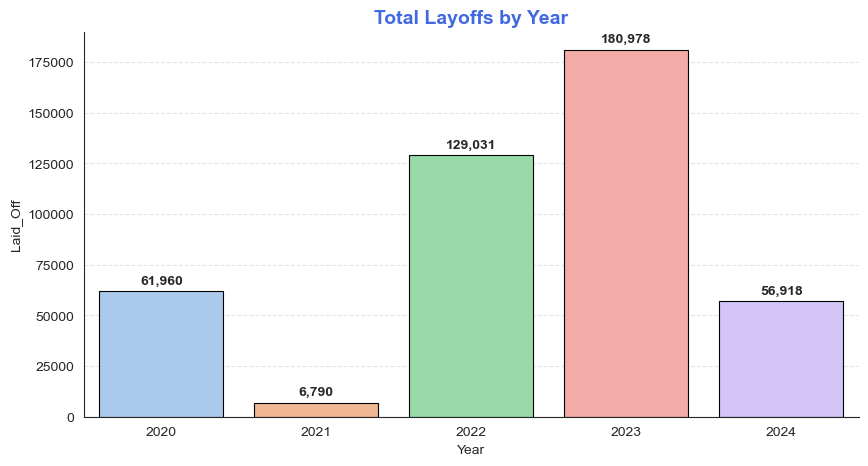

In [437]:
plt.figure(figsize=(10, 5))
yearly_layoffs = Layoff_df_copy.groupby('Year')['Laid_Off'].sum().reset_index()

sns.barplot(data=yearly_layoffs, x='Year', y='Laid_Off', palette='pastel', edgecolor='black', linewidth=0.8, hue='Year', legend=False)
plt.title('Total Layoffs by Year', fontsize=14, color='#4169E1', fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.5)

for i, val in enumerate(yearly_layoffs['Laid_Off']):
    plt.text(i, val + (yearly_layoffs['Laid_Off'].max() * 0.02), f'{int(val):,}', ha='center', fontweight='bold')

sns.despine()
plt.show()

<p dir="rtl" style="text-align: right; color: black; margin-top: 10px;">
ניתן לראות כי שנת 2023 בולטת כשנת שיא דרמטית, עם היקף פיטורים הגבוה כמעט פי 3 מהשנה שקדמה לה, מה שמעיד על החרפת המשבר בשנה זו.
</p>

<h4 style="color: #4169E1; text-align: right; direction: rtl;">1.2 מגמות רבעוניות - ציר זמן</h4>
<p dir="rtl" style="text-align: right;">
כאן אנו יורדים לרמת הרבעון כדי להבין מתי בדיוק התרחשו הזינוקים המשמעותיים. הקו האדום עוזר לנו לראות את הדינמיות של השוק ואת תקופות ה"שיא" של המשבר.
</p>

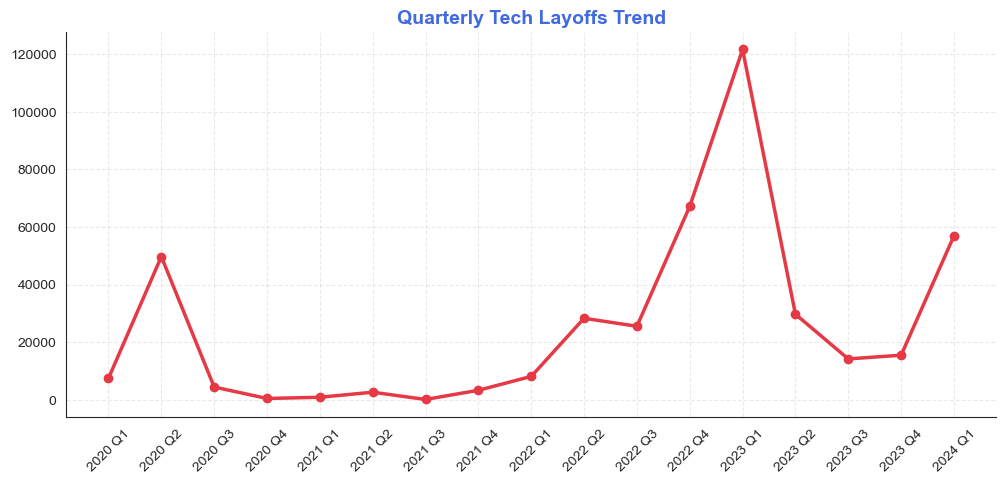

In [407]:
plt.figure(figsize=(12, 5))
Layoff_df_copy['Quarter_Display'] = Layoff_df_copy['Date_layoffs'].dt.to_period('Q').astype(str).str.replace('Q', ' Q')
qtr_summary = Layoff_df_copy.groupby('Quarter_Display')['Laid_Off'].sum().reset_index()
qtr_summary.columns = ['Quarter_Display', 'Total_Laid_Off']
qtr_summary = qtr_summary.sort_values('Quarter_Display')

plt.plot(qtr_summary['Quarter_Display'], qtr_summary['Total_Laid_Off'], marker='o', color='#e63946', linewidth=2.5)
plt.title('Quarterly Tech Layoffs Trend', fontsize=14, color='#4169E1', fontweight='bold')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.4)
sns.despine()
plt.show()

<p dir="rtl" style="text-align: right; color: black; margin-top: 10px;">
ניתן לראות כי הזינוק הגדול ביותר התרחש ברבעון הראשון של שנת 2023. מאז, אנו עדים למגמת ירידה הדרגתית אך עקבית בהיקפי הפיטורים לאורך הרבעונים הבאים.
</p>

<h4 style="color: #4169E1; text-align: right; direction: rtl;">1.3 התפלגות עוצמת הפיטורים (Boxplot)</h4>
<p dir="rtl" style="text-align: right;">
בניגוד לגרפים הקודמים שהראו סכומים, ה-Boxplot מראה לנו את הפיזור של כל אירוע פיטורים בנפרד. זה עוזר לנו להבין האם רבעון מסוים היה קשה בגלל הרבה אירועים קטנים, או בגלל מספר מצומצם של "פיטורי ענק".
</p>

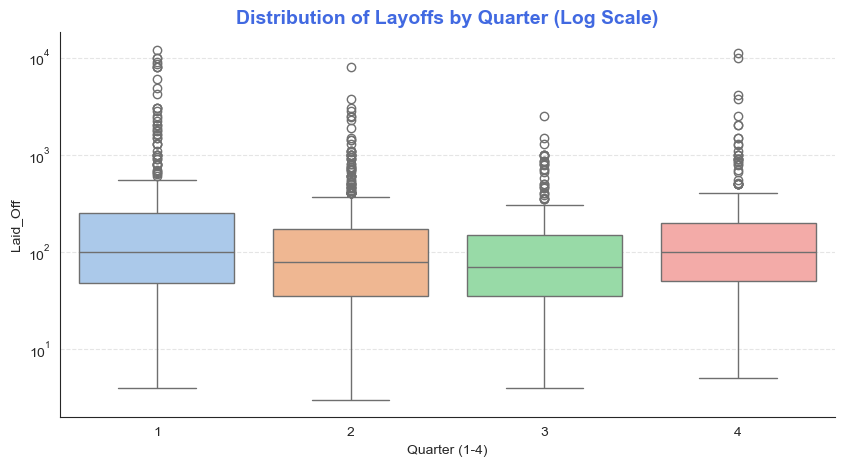

In [420]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=Layoff_df_copy, x='Quarter_Num', y='Laid_Off', palette='pastel', hue='Quarter_Num', legend=False)
plt.title('Distribution of Layoffs by Quarter (Log Scale)', fontsize=14, color='#4169E1', fontweight='bold')
plt.yscale('log')
plt.xlabel('Quarter (1-4)')
plt.grid(axis='y', linestyle='--', alpha=0.5)

sns.despine()
plt.show()

<p dir="rtl" style="text-align: right; color: black; margin-top: 10px;">
ניתן לראות כי הנקודות החריגות שנמצאות מעל התיבות מאשרות שהמשבר מובל בעיקר על ידי מספר מצומצם של "פיטורי ענק", בעוד שרוב החברות ביצעו צמצומים קטנים בהרבה.
</p>

<h4 style="color: #4169E1; text-align: right; direction: rtl;">📌 לסיכום ניתוח מגמות הזמן:</h4>

<p dir="rtl" style="text-align: right; color: black; line-height: 1.8;">
מכלול הגרפים והניתוחים שבוצעו בפרק זה מצביע על כך שמשבר הפיטורים בהייטק אינו אירוע נקודתי, אלא תהליך עמוק שהושפע מהשינויים הכלכליים בעולם בשנים האחרונות.
</p>

<ul dir="rtl" style="text-align: right; color: black; line-height: 1.8; padding-right: 40px;">
    <li><b>נקודת המפנה (שנת 2023):</b> הנתונים הראו ששנת 2023 הייתה שנת שבר. הזינוק בכמות המפוטרים מוכיח שלא מדובר רק ב"זנב" של משבר הקורונה, אלא בשינוי מצב שבו הכסף הפך ליקר יותר (עליית ריבית), מה שאילץ את החברות להצטמצם.</li>
    <li><b>אפקט הדומינו:</b> הניתוח הרבעוני חשף שהשיא נרשם <b>ברבעון הראשון של שנת 2023</b>. זה מחזק את התובנה שקיימת תגובת שרשרת בשוק – ברגע שחברות הענק מובילות מהלך של פיטורים, שאר השוק נוטה ליישר קו במהירות.</li>
    <li><b>מבנה המשבר:</b> גרף ה-Boxplot גילה שהמשבר מובל בעיקר על ידי "אירועי ענק" של מספר מצומצם של חברות גדולות. בעוד שרוב החברות ביצעו צמצומים קטנים יחסית, ענקיות הטכנולוגיה הן אלו שמשכו את המספרים למעלה.</li>
</ul>

<p dir="rtl" style="text-align: right; color: black; line-height: 1.8; font-weight: bold; margin-top: 15px;">
לסיכום, הנתונים מחזקים את ההבנה שציר הזמן של הפיטורים מושפע ישירות מהיציבות הכלכלית העולמית ומצעדים של השחקנים הגדולים בשוק.</p>

<h3 style="color: #4169E1; background-color: #f0f4ff; padding: 10px; border-right: 5px solid #4169E1; text-align: right; direction: rtl;">חלק שני: פילוח לפי תעשיות (Industries)</h3>

<p dir="rtl" style="text-align: right; color: black; line-height: 1.8;">
לאחר שניתחנו את ציר הזמן של המשבר, בחלק זה נתמקד בזהות החברות הנפגעות ונבדוק אילו מגזרים בתעשיית ההייטק ספגו את המכה הקשה ביותר:
</p>

<ul dir="rtl" style="text-align: right; color: black; line-height: 1.8; padding-right: 40px;">
    <li><b>דירוג התעשיות הנפגעות:</b> נזהה את עשר התעשיות המובילות בכמות הפיטורים הכוללת כדי להבין היכן התרכז עיקר הנזק.</li>
    <li><b>השוואת עומק:</b> נבחן את הקשר בין סוג התעשייה לבין היקף הפיטורים הממוצע בכל אירוע, כדי להבחין בין סקטורים שפיטרו "רוחבית" לבין כאלו שחוו קריסות של חברות ענק.</li>
    <li><b>ניתוח חסינות:</b> ננסה לזהות אילו תעשיות נותרו יציבות יחסית גם בשיא המשבר ומה ניתן ללמוד מכך על החוסן שלהן.</li>
</ul>

<h3 style="color: #4169E1; background-color: #f0f4ff; padding: 10px; border-right: 5px solid #4169E1; text-align: right; direction: rtl;">חלק שלישי: ניתוח חוסן עסקי וגיוסי הון</h3>

<p dir="rtl" style="text-align: right; color: black; line-height: 1.8;">
לאחר שבחנו את ציר הזמן ואת התעשיות השונות, בחלק זה ננסה להבין את הקשר בין המבנה הכלכלי של החברה לבין ההחלטה על פיטורים:
</p>

<ul dir="rtl" style="text-align: right; color: black; line-height: 1.8; padding-right: 40px;">
    <li><b>הקשר בין גיוס הון לפיטורים:</b> נבדוק האם חברות שגייסו סכומי כסף גדולים (Funding) נטו לפטר יותר עובדים, או שמא הכסף שימש להן כ"כרית ביטחון".</li>
    <li><b>ניתוח לפי שלב החברה (Series):</b> נשווה בין חברות צעירות (סטארט-אפים בתחילת הדרך) לבין חברות בוגרות וציבוריות, כדי לראות מי מהן היתה רגישה יותר לתנודות השוק.</li>
    <li><b>מפת חום של קשרים (Correlations):</b> נציג את הקשר הסטטיסטי בין גודל החברה, כמות הכסף שגויסה וחומרת הפיטורים כדי לזהות דפוסים חוזרים.</li>
</ul>